In [5]:
import numpy as np
import matplotlib.pyplot as plt



import sympy as sym


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

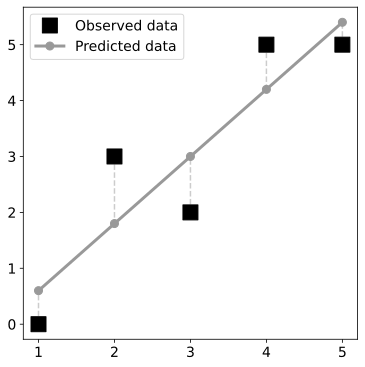

In [6]:
## this code creates figure 2

# data
x = [ 1,2,3,4,5 ]
y = [ 0,3,2,5,5 ]

# model
X = np.hstack((np.ones((5,1)),np.array(x,ndmin=2).T))
yHat = X @ np.linalg.inv(X.T@X) @ X.T @ y

# plot the data and predicted values
plt.figure(figsize=(6,6))
plt.plot(x,y,'ks',markersize=15,label='Observed data')
plt.plot(x,yHat,'o-',color=[.6,.6,.6],linewidth=3,markersize=8,label='Predicted data')

# plot the residuals (errors)
for n,y,yHat in zip(x,y,yHat):
    plt.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.legend()
plt.show()

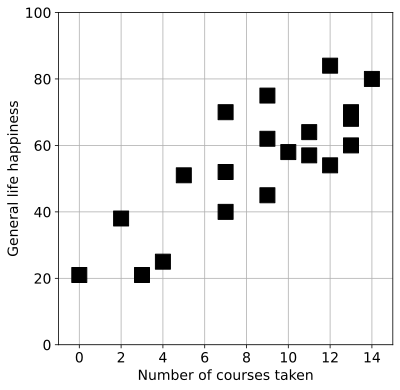

In [7]:
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

plt.figure(figsize=(6,6))

plt.plot(numcourses,happiness,'ks',markersize=15)
plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.grid()
plt.xticks(range(0,15,2))
plt.show()

In [8]:
# Build a statistical model

# design matrix as a column vector
X = np.array(numcourses,ndmin=2).T
print(X.shape)

# fit the model using the left-inverse
X_leftinv = np.linalg.inv(X.T@X) @ X.T

# solve for the coefficients
beta = X_leftinv @ happiness
beta

(20, 1)


array([5.92402926])

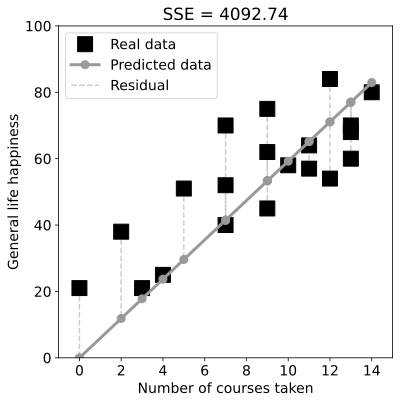

In [9]:
# let's plot it!

# predicted data
pred_happiness = X@beta


plt.figure(figsize=(6,6))

# plot the data and predicted values
plt.plot(numcourses,happiness,'ks',markersize=15)
plt.plot(numcourses,pred_happiness,'o-',color=[.6,.6,.6],linewidth=3,markersize=8)

# plot the residuals (errors)
for n,y,yHat in zip(numcourses,happiness,pred_happiness):
    plt.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.xticks(range(0,15,2))
plt.legend(['Real data','Predicted data','Residual'])
plt.title(f'SSE = {np.sum((pred_happiness-happiness)**2):.2f}')
plt.show()

In [10]:
# Build a statistical model with an intercept

# design matrix as a column vector
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
print(X.shape)

# fit the model using the left-inverse
X_leftinv = np.linalg.inv(X.T@X) @ X.T

# solve for the coefficients
beta = X_leftinv @ happiness
beta

(20, 2)


array([23.13033815,  3.69820606])

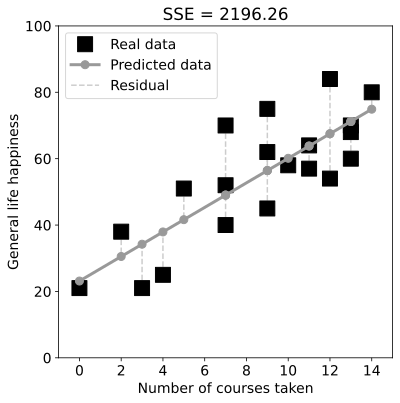

In [11]:
# let's plot it!

# predicted data
pred_happiness = X@beta


plt.figure(figsize=(6,6))

# plot the data and predicted values
plt.plot(numcourses,happiness,'ks',markersize=15)
plt.plot(numcourses,pred_happiness,'o-',color=[.6,.6,.6],linewidth=3,markersize=8)

# plot the residuals (errors)
for n,y,yHat in zip(numcourses,happiness,pred_happiness):
    plt.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.xticks(range(0,15,2))
plt.legend(['Real data','Predicted data','Residual'])
plt.title(f'SSE = {np.sum((pred_happiness-happiness)**2):.2f}')
plt.show()

# 연습 문제
## 연습 문제 10-1

Dot product: -5.752553988713771e-11
Correlation: -1.9724313754422123e-16
 


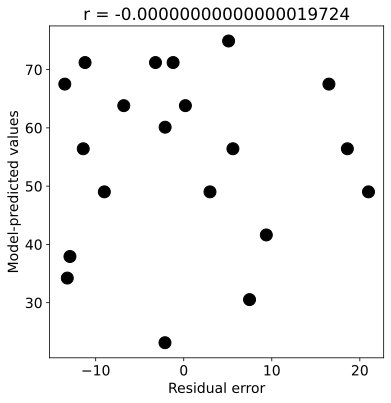

In [12]:
# compute residual
res = happiness-pred_happiness


# should be zero + some error
print('Dot product: ' + str(np.dot(pred_happiness,res)) )
print('Correlation: ' + str(np.corrcoef(pred_happiness,res)[0,1]))
print(' ')


# show in a plot
plt.figure(figsize=(6,6))
plt.plot(res,pred_happiness,'ko',markersize=12)
plt.xlabel('Residual error')
plt.ylabel('Model-predicted values')
plt.title(f'r = {np.corrcoef(pred_happiness,res)[0,1]:.20f}')
plt.show()

In [13]:
# correlation is smaller because we're dividing by the vector norms, e.g.,
np.linalg.norm(res)

46.86431997187644

## 연습 문제 10-2

In [15]:
# null space
from scipy.linalg import null_space

# the residual is orthogonal to the entire column space of the design matrix.

# I demonstrated this by showing that the residuals vector is in the left-null space of the design matrix.
# I did that by using scipy.linalg.null_space to find the left-null space, augmenting that null-space basis
# matrix by the residuals vector, and showing that the null space and augmented null space have the same rank.


# compute the null space (via scipy.linalg)
nullspace = null_space(X.T)


# augment the residuals
nullspaceAugment = np.hstack( (nullspace,res.reshape(-1,1)) )


# print their ranks
print(f'dim(  N(X)    ) = {np.linalg.matrix_rank(nullspace)}')
print(f'dim( [N(X)|r] ) = {np.linalg.matrix_rank(nullspaceAugment)}')

dim(  N(X)    ) = 18
dim( [N(X)|r] ) = 18


In [17]:
X.T.shape, nullspaceAugment.shape

((2, 20), (20, 19))

## 연습 문제 10-3

In [22]:
X = np.hstack((np.ones((20, 1)), np.array(numcourses, ndmin=2).T))
beta1 = np.linalg.inv(X.T@X)@X.T@happiness

In [24]:
Q, R = np.linalg.qr(X)
beta2 = np.linalg.inv(R)@(Q.T@happiness)

In [25]:
tmp = (Q.T@happiness).reshape(-1, 1)
Raug = np.hstack((R, tmp))
Raug_r = sym.Matrix(Raug).rref()[0]
beta3 = np.array(Raug_r[:, -1])

In [26]:
print('Betas from left-inverse: ')
print(np.round(beta1,3)), print(' ')

print('Betas from QR with inv(R): ')
print(np.round(beta2,3)), print(' ')

print('Betas from QR with back-substitution: ')
print(np.round(np.array(beta3.T).astype(float),3)) # transposed to facilitate visual inspection

Betas from left-inverse: 
[23.13   3.698]
 
Betas from QR with inv(R): 
[23.13   3.698]
 
Betas from QR with back-substitution: 
[[23.13   3.698]]


In [27]:
# show the matrices
print('Matrix R:')
print(np.round(R,3)) # note that it's upper-triangular (as you know!)

print(' ')
print("Matrix R|Q'y:")
print(np.round(Raug,3))

print(' ')
print("Matrix RREF(R|Q'y):")
print(np.round(np.array(Raug_r).astype(float),3)) # convert to numpy floats

Matrix R:
[[ -4.472 -38.237]
 [  0.     17.747]]
 
Matrix R|Q'y:
[[  -4.472  -38.237 -244.849]
 [   0.      17.747   65.631]]
 
Matrix RREF(R|Q'y):
[[ 1.     0.    23.13 ]
 [ 0.     1.     3.698]]


## 연습 문제 10-4

In [28]:
# happiness with outliers due to typos (oops!)
happiness_oops1 = [170,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness_oops2 = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,170]

In [29]:
X = np.hstack((np.ones((20, 1)), np.array(numcourses, ndmin=2).T))
X_leftinv = np.linalg.inv(X.T@X)@X.T

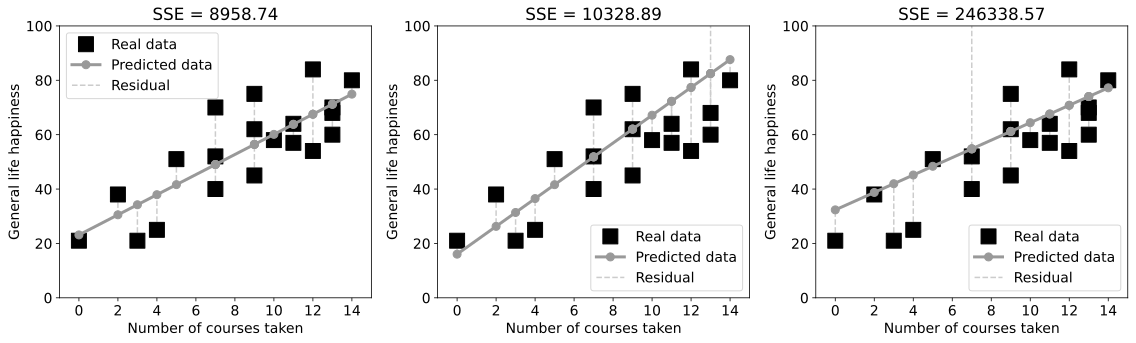

In [31]:
_,axs = plt.subplots(1,3,figsize=(16,5))

for axi,y in zip(axs,[happiness,happiness_oops1,happiness_oops2]):

    # compute the best-fit parameters
    beta = X_leftinv @ y
    
    # predicted data
    pred_happiness = X@beta
    
    
    # plot the data and predicted values
    axi.plot(numcourses,y,'ks',markersize=15)
    axi.plot(numcourses,pred_happiness,'o-',color=[.6,.6,.6],linewidth=3,markersize=8)
    
    # plot the residuals (errors)
    for n,y,yHat in zip(numcourses,y,pred_happiness):
        axi.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)
    
    # make the plot look nicer
    axi.set(xlabel='Number of courses taken',ylabel='General life happiness',
          xlim=[-1,15],ylim=[0,100],xticks=range(0,15,2))
    axi.legend(['Real data','Predicted data','Residual'])
    axi.set_title(f'SSE = {np.sum((pred_happiness-y)**2):.2f}')

plt.tight_layout()
plt.show()

## 연습 문제 10-5

In [35]:
n = 6
X = np.random.randn(n, n)
Y = np.eye(n)

In [37]:
Xinv1 = np.zeros_like(X)
for coli in range(n):
    Xinv1[:, coli] = np.linalg.inv(X.T@X)@X.T@Y[:, coli]

In [38]:
Xinv2 = np.linalg.inv(X.T@X)@X.T@Y

In [39]:
Xinv3 = np.linalg.inv(X)

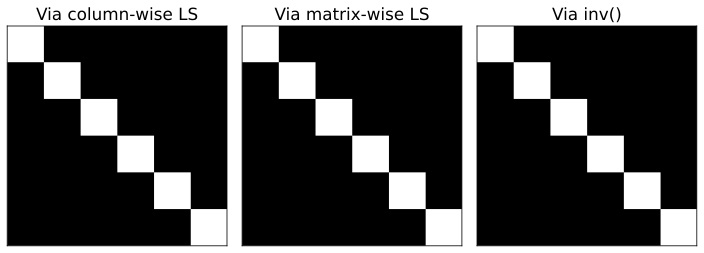

In [43]:
_, axs = plt.subplots(1, 3, figsize=(10, 6))

axs[0].imshow(Xinv1@X, cmap='gray')
axs[0].set_title('Via column-wise LS')

axs[1].imshow(Xinv2@X, cmap='gray')
axs[1].set_title('Via matrix-wise LS')

axs[2].imshow(Xinv3@X, cmap='gray')
axs[2].set_title('Via inv()')

for a in axs: a.set(xticks=[], yticks=[])
plt.tight_layout()
plt.show()